# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

Using machine learning and deep learning, identify handwritten cursive letters.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [1]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

In [3]:
# import zipfile

# with zipfile.ZipFile("Cursive.zip", 'r') as zip_ref:
#     zip_ref.extractall()

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Some things I'm thinking about:
- black and white
- scale images
- canny edges

In [4]:
from pathlib import Path
import cv2
import glob

In [40]:
all_files = glob.glob('Cursive/**', recursive=True)

file_extensions = set()
for file_path in all_files:
   if os.path.isfile(file_path):
       _, extension = os.path.splitext(file_path)
       if extension:
           file_extensions.add(extension)
print("Unique file extensions:", file_extensions)

Unique file extensions: {'.png', '.jpeg', '.heic', '.jpg', '.PNG', '.JPG', '.HEIC'}


In [41]:
# look for types of file endings
png_count = len(glob.glob('Cursive/**/*.png', recursive=True))

for i in file_extensions:
    ext_counter = len(glob.glob(f'Cursive/**/*{i}', recursive=True))
    print(f"{i}: {ext_counter}")

.png: 78
.jpeg: 36
.heic: 41
.jpg: 106
.PNG: 52
.JPG: 104
.HEIC: 415


In [42]:
import os

# file folder counts
dirs = 0
files = 0

for root, dirnames, filenames in os.walk("Cursive"):
    dirs += len(dirnames)
    files += len(filenames)

print(dirs)
print(files)

39
900


In [43]:
from collections import Counter

counts = Counter()

for f in Path("Cursive").rglob("*"):
        if f.is_file():
            counts[str(f.parent)] += 1

bad_folders = []
for folder, num_files in sorted(counts.items()):
        if num_files != 26:
            print(f"{folder:} | {num_files}")
            bad_folders.append(folder)

Cursive | 1
Cursive/S10/S13 | 76
Cursive/S11 | 2
Cursive/S11/.ipynb_checkpoints | 2
Cursive/S14 | 5
Cursive/S17 | 25
Cursive/S33 | 25
Cursive/S34 | 10


## Conclusions

I need to:
- Label Data
- Crop images (content aware)
- Rotate (not sure)
- Black and white (opencv)
- Canny edge (highlight edges so the letters are easier to pick out)

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [44]:
# label every handwriting thing as a-z and append index (a_4)
# exclude folders with counts != 26

all_folders = [f for f in glob.glob('Cursive/**', recursive=True) if os.path.isdir(f)]
good_folders = [x for x in all_folders if x not in list(bad_folders) and x != "Cursive/"]
print(good_folders, len(all_folders), len(good_folders))

['Cursive/S19', 'Cursive/S35', 'Cursive/S29', 'Cursive/S10', 'Cursive/S10/S11', 'Cursive/S10/S14', 'Cursive/S10/S12', 'Cursive/S26', 'Cursive/S16', 'Cursive/S18', 'Cursive/S20', 'Cursive/S12', 'Cursive/S21', 'Cursive/S2', 'Cursive/S3', 'Cursive/S28', 'Cursive/S32', 'Cursive/S27', 'Cursive/S1', 'Cursive/s15', 'Cursive/S23', 'Cursive/S4', 'Cursive/S30', 'Cursive/S9', 'Cursive/S13', 'Cursive/S5', 'Cursive/S7', 'Cursive/S25', 'Cursive/S31', 'Cursive/S24', 'Cursive/S8', 'Cursive/S6'] 39 32


In [45]:
import os
import glob
import string
import shutil


letters = string.ascii_lowercase + string.ascii_uppercase
 
src_root = ""
dst_root = "LabeledData"

good_folders = sorted(good_folders, key=lambda x: (len(x), x))

os.makedirs(dst_root, exist_ok=True)
folder_to_label = {folder: letters[i % len(letters)] for i, folder in enumerate(good_folders)}

for idx, folder_name in enumerate(good_folders):
    src_folder = os.path.join(src_root, folder_name)
    dst_folder = os.path.join(dst_root, folder_name)
    os.makedirs(dst_folder, exist_ok=True)

    files = sorted(
        [f for f in glob.glob(os.path.join(src_folder, "*"), recursive=True) if os.path.isfile(f)],
        key=lambda x: os.path.basename(x)
    )

    if not files:
        print("no file")
        continue

    folder_label = folder_to_label[folder_name]

    for j, path in enumerate(files):
        label = letters[j % len(letters)]
        ext = os.path.splitext(path)[1]
        new_name = f"{label}_{idx}{ext}"
        dst_path = os.path.join(dst_folder, new_name)
        shutil.copy2(path, dst_path)

    print(f"copied {len(files)} from {folder_name}")


copied 26 from Cursive/S1
copied 26 from Cursive/S2
copied 26 from Cursive/S3
copied 26 from Cursive/S4
copied 26 from Cursive/S5
copied 26 from Cursive/S6
copied 26 from Cursive/S7
copied 26 from Cursive/S8
copied 26 from Cursive/S9
copied 26 from Cursive/S10
no file
no file
copied 26 from Cursive/S16
copied 26 from Cursive/S18
copied 26 from Cursive/S19
copied 26 from Cursive/S20
copied 26 from Cursive/S21
copied 26 from Cursive/S23
copied 26 from Cursive/S24
copied 26 from Cursive/S25
copied 26 from Cursive/S26
copied 26 from Cursive/S27
copied 26 from Cursive/S28
copied 26 from Cursive/S29
copied 26 from Cursive/S30
copied 26 from Cursive/S31
copied 26 from Cursive/S32
no file
copied 26 from Cursive/s15
copied 26 from Cursive/S10/S11
copied 26 from Cursive/S10/S12
copied 26 from Cursive/S10/S14


In [46]:
!pip3 install pillow_heif

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import shutil
from pathlib import Path

root = Path("LabeledData/Cursive")

count = 0
for checkpoint_dir in root.rglob(".ipynb_checkpoints"):
    if checkpoint_dir.is_dir():
        shutil.rmtree(checkpoint_dir)
        count += 1
print(count)

0


In [103]:
from PIL import Image
from pillow_heif import register_heif_opener

register_heif_opener()

os.makedirs("Exploded", exist_ok=True)

formatting = 'png'

all_files = list(Path("LabeledData/Cursive").rglob("*.*"))

for i, f in enumerate(all_files):
    with Image.open(f) as img:
        out_path = f"Exploded/{f.stem}.png"
        img.save(out_path, "PNG")
    if i % 100 == 0:
        print(f"saved {i+1}/{len(all_files)} — {f.name}")

saved 1/702 — n_14.jpg
saved 101/702 — k_20.HEIC
saved 201/702 — a_16.jpg
saved 301/702 — c_26.png
saved 401/702 — x_17.HEIC
saved 501/702 — p_4.heic
saved 601/702 — m_18.HEIC
saved 701/702 — u_31.HEIC


HEIC files take a really long time to convert, which is why this block above takes ages. Downscaling the images so early on makes my preprocessing much harder though, so I have to keep the images at their original resolutions. 

In [106]:
from IPython.display import display, clear_output
from PIL import Image
import glob

def display_imgs(folder):
    all_files = sorted(glob.glob(f"{folder}/*.png"))

    scale = 0.1
    
    for f in all_files:
        img = Image.open(f)
      
        width, height = img.size
        new_size = (int(width * scale), int(height * scale))
        img_resized = img.resize(new_size, Image.LANCZOS)
        
        clear_output(wait=True)
        display(img_resized)
        
        u = input(f"file name: {f}")

        if u == "quit":
            return

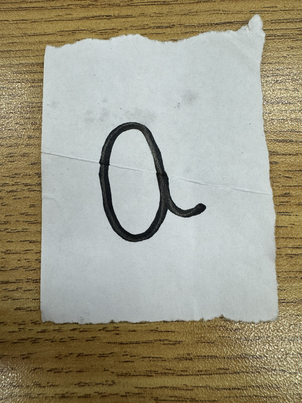

file name: Exploded/a_0.png quit


In [107]:
display_imgs("Exploded")

In [108]:
discrepencies = ["a_3", "b_3", "b_0", "b_1", "b_2", "b_4", "d_0", "d_1", "d_2", "d_3", "d_4", "e_0", "e_1"]

# need to remove a-z for 1, 2, 3, and 4 because they're uppercase

letters = string.ascii_lowercase
numbers = [0, 1, 2, 3, 4]

for folder, _, _ in os.walk(Path("Exploded")):
    for letter in letters:
        for number in numbers:
            pattern = os.path.join(folder, f"{letter}_{number}.*")
            for f in glob.glob(pattern):
                os.remove(f)

In [186]:
all_files = list(Path("Exploded").rglob("*.*"))

os.makedirs("Preprocess", exist_ok=True)

for i, f in enumerate(all_files):
    p = cv2.imread(str(f))

    if p is None:
        print(f"img not found: {str(f)}")
        continue
        
    gray = cv2.cvtColor(p, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'Preprocess/{f.name}', gray)
    if i % 100 == 0:
        print(f"preprocessed {i}/{len(all_files)}")
print("done")

preprocessed 0/577
preprocessed 100/577
img not found: Exploded/.ipynb_checkpoints
preprocessed 200/577
preprocessed 300/577
preprocessed 400/577
preprocessed 500/577
done


In [187]:
# remove everything with checkpoint in its name. idk why jupyter lab is doing this to me
folder = Path("Preprocess")

for file in folder.rglob("*checkpoint*"):
    if file.is_file():
        file.unlink()

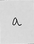

file name: Preprocess/a_12.png quit


In [188]:
display_imgs("Preprocess")

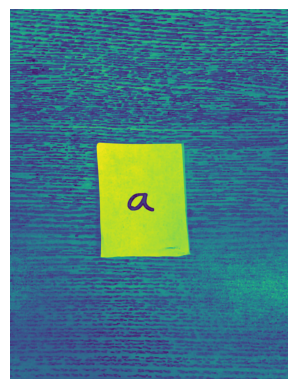

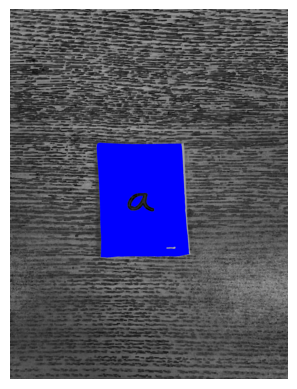

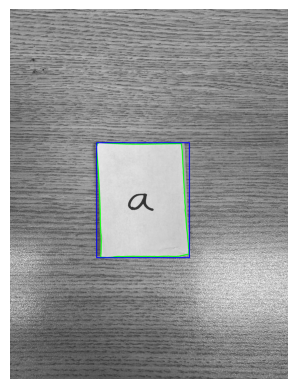

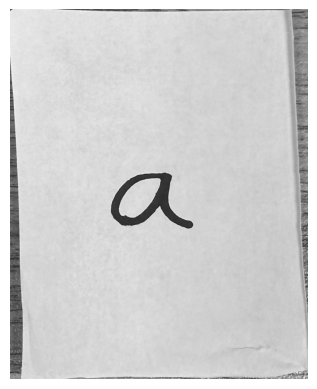

In [252]:
img = cv2.imread('Preprocess/a_13.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5, 5), np.uint8)
enhanced_image = cv2.erode(gray, kernel, iterations=3)

plt.imshow(enhanced_image)
plt.axis('off')
plt.show()


ret, mask = cv2.threshold(enhanced_image, 180, 255, cv2.THRESH_BINARY)

img_color = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2BGR)
img_color[mask == 255] = [255, 0, 0]
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    img_cop = img.copy()
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(img_cop, [largest_contour], -1, (0, 255, 0), 10)
    
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(img_cop, (x, y), (x + w, y + h), (0, 0, 255), 10)
    plt.imshow(img_cop)
    plt.axis('off')
    plt.show()

    cropped = img[y:y+h, x:x+w]
    plt.imshow(cropped)
    plt.axis('off')
    plt.show()
else:
    print("no contour found")

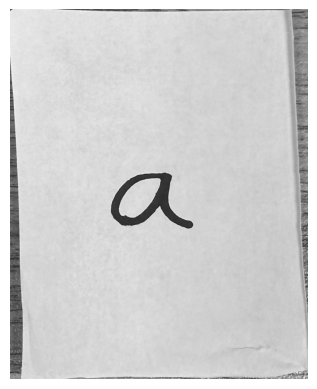

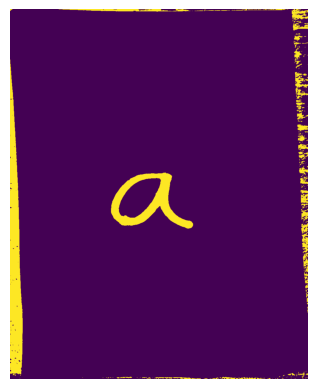

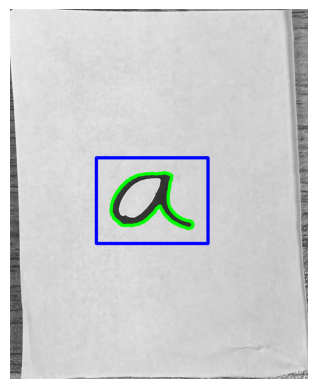

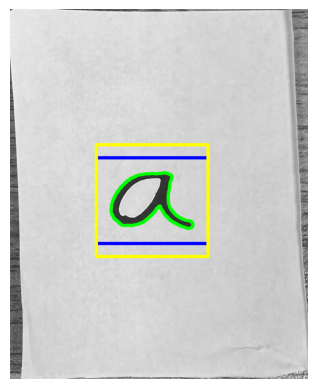

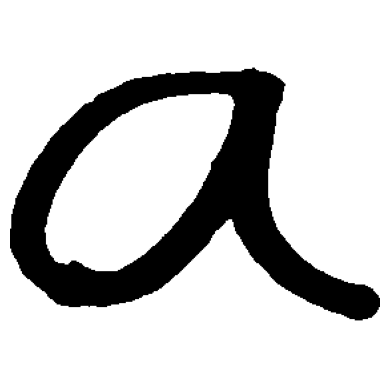

In [253]:
# now look for the darkest thing to mask and then find the largest contour

cropped = img[y:y+h, x:x+w]
plt.imshow(cropped)
plt.axis('off')
plt.show()

cropped_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

percentile = 5
dark_thresh = np.percentile(cropped_gray, percentile)
dark_mask = cv2.inRange(cropped_gray, 0, dark_thresh)

plt.imshow(dark_mask)
plt.axis('off')
plt.show()

contours, hierarchy = cv2.findContours(dark_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    img_rect = cropped.copy()
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(img_rect, [largest_contour], -1, (0, 255, 0), 10)
    
    x, y, w, h = cv2.boundingRect(largest_contour)
    margin = 50
    cv2.rectangle(img_rect, (x - margin, y - margin), (x + w + margin, y + h + margin), (0, 0, 255), 10)
    plt.imshow(img_rect)
    plt.axis('off')
    plt.show()

    size = max(w, h)

    x_center = x + w // 2
    y_center = y + h // 2

    x_new = x_center - size // 2
    y_new = y_center - size // 2

    square = (x_new, y_new, size, size)
    cv2.rectangle(img_rect, (x_new - margin, y_new - margin), (x_new + size + margin, y_new + size + margin), (255, 255, 0), 10)
    plt.imshow(img_rect)
    plt.axis('off')
    plt.show()

    ret, binary = cv2.threshold(cropped, 120, 255, cv2.THRESH_BINARY)
    square_crop = binary[y_new:y_new+size, x_new:x_new+size]
    plt.imshow(square_crop)
    plt.axis('off')
    plt.show()
else:
    print("no contour found")

In [260]:
# full pipeline

# gray
# erode
# find lightest area
# find darkest
# find longest contour
# find bounding box
# binarize
# crop into square

def preprocess_pipeline(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((5, 5), np.uint8)
    enhanced_image = cv2.erode(gray, kernel, iterations=2)

    percentile = 50
    thresh = np.percentile(enhanced_image, percentile)
    ret, mask = cv2.threshold(enhanced_image, thresh, 255, cv2.THRESH_BINARY)
    
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        
        x, y, w, h = cv2.boundingRect(largest_contour)

        scale = 0.9
        new_w = int(w * scale)
        new_h = int(h * scale)
    
        x_center = x + w // 2
        y_center = y + h // 2
    
        x_new = max(x_center - new_w // 2, 0)
        y_new = max(y_center - new_h // 2, 0)
    
        x_end = min(x_new + new_w, gray.shape[1])
        y_end = min(y_new + new_h, gray.shape[0])

        cropped = gray[y_new:y_end, x_new:x_end]

        percentile = 5
        dark_thresh = np.percentile(cropped, percentile)
        dark_mask = cv2.inRange(cropped, 0, dark_thresh)
        
        contours2, hierarchy = cv2.findContours(dark_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
        if contours2:
            largest_contour2 = max(contours2, key=cv2.contourArea)
            
            x, y, w, h = cv2.boundingRect(largest_contour2)
            margin = 50
            
            size = max(w, h)
            x_center = x + w // 2
            y_center = y + h // 2
            x_new = x_center - size // 2
            y_new = y_center - size // 2
            x_new = max(x_new, 0)
            y_new = max(y_new, 0)
        
            square = (x_new, y_new, size, size)
        
            ret, binary = cv2.threshold(cropped, 120, 255, cv2.THRESH_BINARY)
            x_end = min(x_new + size, cropped.shape[1])
            y_end = min(y_new + size, cropped.shape[0])
            square_crop = binary[y_new:y_end, x_new:x_end]
            return square_crop
        else:
            print("no dark contour found")
            return
    else:
        print("no light contour found")
        return

In [261]:
all_files = list(Path("Preprocess").rglob("*.*"))

os.makedirs("Binary", exist_ok=True)

for i, f in enumerate(all_files):
    if i % 100 == 0:
        print(f"crop {i}/{len(all_files)}")
        
    img = cv2.imread(str(f))
    if img is None:
        print(f"error reading {f}")
        continue
        
    crop = preprocess_pipeline(img)
    if crop is not None:
        cv2.imwrite(f"Binary/{f.name}", crop)
    # else:
    #     os.remove(f)
print("done")

crop 0/573
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
crop 100/573
error reading Preprocess/.ipynb_checkpoints
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
crop 200/573
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
crop 300/573
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
no light contour found
crop 400/573
no light contour found
no light contour found
no light contour found
no light contour found
no light contour fo

In [263]:
display_imgs("Binary")

file name: Binary/b_19.png quit


In [264]:
discreps = ["a_22", "a_23", "a_31", "a_6", ]

# the worst ones are from 13, 29, 8, and 9
# im just going to throw those away

letters = string.ascii_lowercase
numbers = [22, 23, 31, 6]

for folder, _, _ in os.walk(Path("Binary")):
    for letter in letters:
        for number in numbers:
            pattern = os.path.join(folder, f"{letter}_{number}.*")
            for f in glob.glob(pattern):
                os.remove(f)

In [265]:
# scale images
# https://www.geeksforgeeks.org/python/resize-multiple-images-using-opencv-python/
all_files = list(Path("Binary").rglob("*.*"))

for i, f in enumerate(all_files):
    if i % 100 == 0:
        print(f"resize {i}/{len(all_files)}")
        
    img = cv2.imread(str(f))
    if img is None:
        print(f"error reading {f}")
        continue
        
    scaled = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)
    cv2.imwrite(f, scaled)
print("done")

resize 0/468
resize 100/468
resize 200/468
resize 300/468
resize 400/468
done


In [266]:
display_imgs("Binary")

file name: Binary/c_29.png quit


In [267]:
misc = ["b_18", "b_21", "b_9", "c_12", "c_17"]

letters = string.ascii_lowercase
numbers = [31, 18, 9]

for folder, _, _ in os.walk(Path("Binary")):
    for letter in letters:
        for number in numbers:
            pattern = os.path.join(folder, f"{letter}_{number}.*")
            for f in glob.glob(pattern):
                os.remove(f)

In [268]:
len(list(Path("Binary").rglob("*.*")))

416

## Conclusions

I went from around 800 to 400 good pieces of data. That's not great. I do know that almost all of the letters that I did keep are good to use, though.

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split

In [42]:
import string
import os
from pathlib import Path
import numpy as np
import shutil
import matplotlib.pyplot as plt

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [44]:
letters = string.ascii_lowercase

for letter in letters:
    os.makedirs(f"FinalClasses/{letter}", exist_ok=True)

for f in Path("Binary").glob("*.png"):
    label = f.stem.split("_")[0]
    shutil.copy2(f, f"FinalClasses/{label}")

In [45]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [54]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_dataset = datasets.ImageFolder(root='FinalClasses', transform=transform)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
trainset, testset = random_split(full_dataset, [train_size, test_size])

trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = full_dataset.classes
print(classes)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


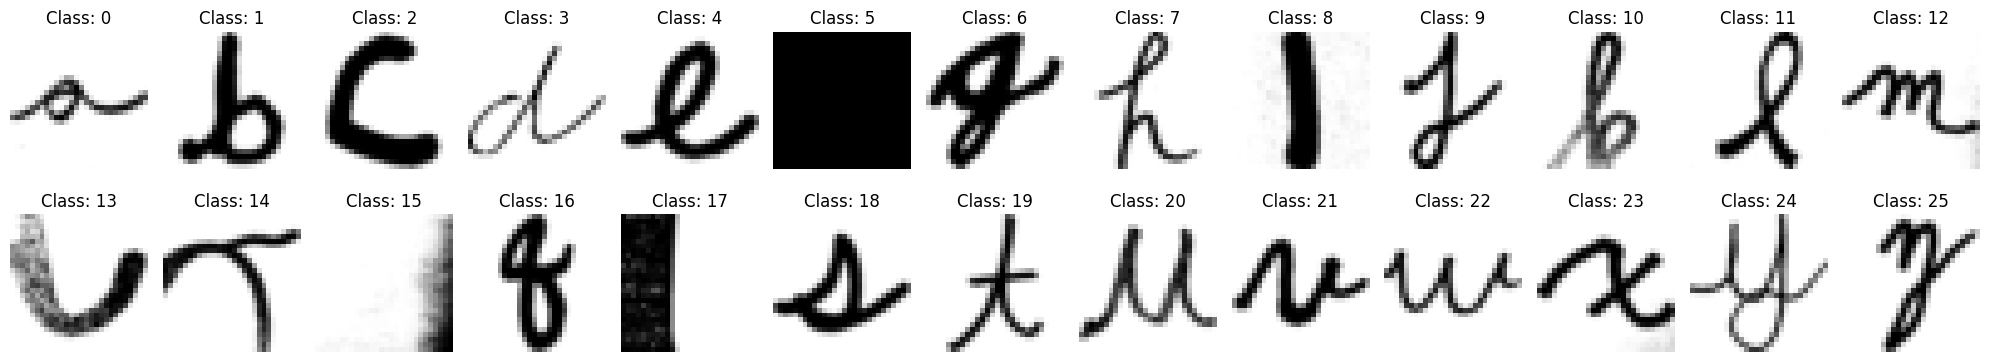

In [55]:
# https://www.kaggle.com/code/rattttttttttt/mnist-ocr-cnn-vs-ann-vs-resnet

def visualize_one_per_class():
    samples = {}
    for img, label in trainset:
        if label not in samples:
            samples[label] = img
        if len(samples) == 26:
            break

    fig, axes = plt.subplots(2, 13, figsize=(20, 4))
    for i in range(26):
        ax = axes[i//13, i%13]
        img = samples[i]
        img_np = img.permute(1, 2, 0).numpy()
        if img_np.shape[2] == 1:
            img_np = img_np.squeeze()
            ax.imshow(img_np, cmap="gray")
        else:
            ax.imshow(img_np)
        ax.set_title(f"Class: {i}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

visualize_one_per_class()

As you can tell, there's still a handful of bad images I didn't catch. The majority are okay though.

In [61]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [63]:
net = Net().to(device)

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [65]:
for epoch in range(3):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    print(f"Epoch {epoch+1} done")

print('Finished Training')

[1,    20] loss: 0.033
[1,    40] loss: 0.033
[1,    60] loss: 0.033
[1,    80] loss: 0.033
[1,   100] loss: 0.033
Epoch 1 done
[2,    20] loss: 0.033
[2,    40] loss: 0.033
[2,    60] loss: 0.033
[2,    80] loss: 0.033
[2,   100] loss: 0.033
Epoch 2 done
[3,    20] loss: 0.033
[3,    40] loss: 0.033
[3,    60] loss: 0.033
[3,    80] loss: 0.033
[3,   100] loss: 0.033
Epoch 3 done
Finished Training


In [66]:
correct = 0
total = 0

net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 2 %


## Conclusions

2-3% is not very good. It's about the same is just guessing. As a result, I'm going to try to use the nist dataset data in conjunction with the class data.

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [68]:
import pandas as pd

In [72]:
train_nist = pd.read_csv('emnist-letters-train.csv')
test_nist = pd.read_csv('emnist-letters-test.csv')

In [75]:
columns = ['labels']
for i in range(train_nist.shape[1]-1):
    columns.append(i)
    
train_nist.columns = columns
test_nist.columns = columns

classes = train_nist['labels'].unique()
print('number of classes: ', len(classes))

train_nist.head()

number of classes:  26


,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from torch.utils.data import Dataset

class CustomPandasDataset(Dataset):
    def __init__(self, dataframe, features_cols, target_col, transform=None):
        self.dataframe = dataframe
        self.features_cols = features_cols
        self.target_col = target_col
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        features = torch.tensor(row[self.features_cols].values, dtype=torch.float32)
        if self.transform:
            features = self.transform(features)
        label = torch.tensor(row[self.target_col], dtype=torch.float32)
        return features, label

In [90]:
mnist_transform = transforms.Compose([
    transforms.Lambda(lambda x: torch.tensor(x).unsqueeze(0)),  # add channel dimension
    transforms.Normalize((0.5,), (0.5,))
])

ntrain = CustomPandasDataset(train_nist, list(range(0, 784)), "labels", transform=mnist_transform)
ntrainloader = DataLoader(ntrain, batch_size=4, shuffle=True, num_workers=2)

ntest = CustomPandasDataset(test_nist, list(range(0, 784)), "labels", transform=mnist_transform)
ntestloader = DataLoader(ntest, batch_size=4, shuffle=True, num_workers=2)

In [91]:
from torch.utils.data import ConcatDataset

nist_df = ConcatDataset([ntrain, ntest])

combined_dataset = ConcatDataset([full_dataset, nist_df])

train_size = int(0.8 * len(combined_dataset))
test_size = len(combined_dataset) - train_size
trainset, testset = random_split(combined_dataset, [train_size, test_size])

trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [94]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
net = Net().to(device)

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import joblib
from scipy.sparse import hstack, csr_matrix


def infrence(text):

    # load everything in
    model = joblib.load("./models/best_mnb.pkl")
    vectorizer = joblib.load("./models/vectorizer.pkl")
    scaler = joblib.load("./models/scaler.pkl")
    feature_params = joblib.load("./models/feature_params.pkl")
    
    s_words = feature_params[0]
    h_words = feature_params[1]
    good_emails = feature_params[2]

    # clean and tokenize the text
    cleaned = re.sub(r'[^A-Za-z\s]', '', text).lower()
    tokens = [word for word in cleaned.split() if word not in stopwords and len(word) > 2]
    token_counter = collections.Counter(tokens)

    # freq of most common words
    spam_freq = np.sum([token_counter[word.lower()] for word in s_words])
    ham_freq = np.sum([token_counter[word.lower()] for word in h_words])

    # amt of punctuation
    punctuation_chars = string.punctuation
    regex_pat = "[" + re.escape(punctuation_chars) + "]"
    punct_freq = len(re.findall(regex_pat, text))

    # good email domain
    good_email_count = sum(1 for x in good_emails if x in text.lower())

    # msg length
    msg_len = len(text)

    # create df of numeric
    numeric_features = pd.DataFrame([[spam_freq, punct_freq, msg_len, ham_freq, good_email_count]],
                                columns=['spam_most_common_freq','punctuation_freq','msg_len','ham_most_common_freq','good_email'])
    numeric_features_scaled = scaler.transform(numeric_features)

    # vectorize words
    text_features = vectorizer.transform([text])
    X = hstack([text_features, csr_matrix(numeric_features_scaled)])
    
    # predcit!
    prediction = model.predict(X)
        
    return prediction[0]

In [ ]:
test1 = '''Subject: stock market information

sender : trinity venture , inc . address : 1911 westmead # 2710 , houston , tx 7707 call fax toll free : 877-393 - 7237 hours : 9 5 pm cst hi , receive e-mail address someone interest stock market information . e-mail informational purpose . offer sell solicit security . wish receive type information , please click " reply " put " remove " subject . permanently remove address our database . news help due diligence abrg , www . yahoo . com click " stock quote " . put abrg symbol lookup area click " quote " . happy invest ! - dean casia president trinity venture , inc . news release ambra resources group inc . # 610-800 west pender street vancouver , b . c . canada v6c 2v6 symbol abrg ( otc : bb ) acquisition venture oil & gas , inc . ambra resources group inc . adds projects ambra vancouver , british columbium - 4 , 1999 ambra resource group inc . ( otc bb : abrg ) , acquire 50 % ownership venture oil & gas , inc . ambra become 50 % owner property project venture interest . consideration ambra 's purchase 50 % capital stock venture inc . one million shares ambra common stock . part acquisition , venture assign ambra , 50 % interest bastian bay field prospect , state lease " 9800 " . 1 , plaquemine parish , louisiana . additional project assign ambra venture ambra shall right request assignment 50 % interest retain venture various project . primary business venture inc . acquire oil gas property re-mediation re-completion work result enhance recovery rate bring back commercial production . current economic condition petroleum industry facilitate acquisition property larger produce company declare surplus property . ambra venture inc . favorable position able acquire property while inventory offering high level . venture currently negotiate acquisition multiple oil gas project texa , louisiana oklahoma , party anticipate add significantly ambra 's resource base productive project . board director john m . hickey , president contact : ambra resource group inc . investor relation : 800-698 - 3377 604-669 - 2723 web site : http : / / www . ambraresource . com release informational purpose . offer sell solicit security product kind . release include information constitute forward-look statement pursuant safe harbor provision private security litigation reform act 1995 . forward-look statement involve risk uncertainty cause actual result differ materially future result encompass within forward-look statement . material provide ambra resource group inc . " " basis . ambra resource group inc . expressly disclaim warranty , express imply , include without limitation , warranty merchantability fitness particular purpose , respect service material product . event shall ambra resource group inc . liable direct , indirect , incidental , punitive consequential damages kind whatsoever respect service , material product . trinity venture , inc . receive fee $ 5 , 0 distribute document . permanently remove e-mail address our file call fax us toll free 877-393 - 7237 ; click " reply " put " remove " subject .
'''
pred = infrence(test1)
print("spam" if pred == 1 else "ham")

In [ ]:
test2 = '''Subject: postdoc position groningen , netherland

job position : postdoc dept . social pharmacy pharmacoepidemiology , groningen institute drug study , faculty mathematic natural science , netherland . description work group social pharmacy pharmacoepidemiology perform fundamental apply research epidemiological medical literature database order determine effectiveness / side-effect profile drug . post-doc ask participate program develop computer text analysis pattern recognition technique extraction ( side ) effect profile drug pharmaceutical medical electronic literature database : ( 1 ) source information lead innovative drug research ; ( 2 ) determine benefit-risk profile drug . phd - student assign program . requirement computer linguist computer scientist , complete phd - project expertise corpus linguistics , mathematical linguistics intelligent information retrieval ; interest pharmaceutical science innovative drug research ; expertise datum mine pattern recognition method desire . remark salary basis ministry guideline minimum dfl . 3844 , - maximum dfl . f . 7 . 125 , - ( schaal 10 / 11 rwoo ) bruto pro month , dependent education experience . work group social pharmacy pharmacoepidemiology part dutch school ' groningen - utrecht institute drug exploration ' ( guide ) , acknowledge royal dutch academy science . appointment two . information project : prof . dr . r . vo , email : r . vo @ farm . rug . nl ; tel . + 31 . 50 . 3633331 / 3633272 ; fax . + 31 . 50 . 3633311 . reaction . s . . p . , preferably before july 1st , 1997 . - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - marc weeber http : / / www . farm . rug . nl / marc / home . html groningen university centre pharmacy marc @ farm . rug . nl social pharmacy pharmacoepidemiology tel : + 31 50 3637571 _ _ _ . deusinglaan 2 fax : + 31 50 3633311 | 9713 aw groningen , netherland - - - - - - - - - - - - - - - - - - - - - 0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
'''
pred = infrence(test2)
print("spam" if pred == 1 else "ham")